In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

swiss = GaussianMixture.symmetric_2D(5, std=1, scale=10.0).to(device)

gaussian_path = GaussianConditionalProbabilityPath(p_data=swiss, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="FM", model=model)

trainer.train_loop(num_epochs=5000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 54.19285583496094
In Epoch 1000 we have a loss of 12.176678657531738
In Epoch 2000 we have a loss of 10.335647583007812
In Epoch 3000 we have a loss of 10.234898567199707
In Epoch 4000 we have a loss of 11.041844367980957


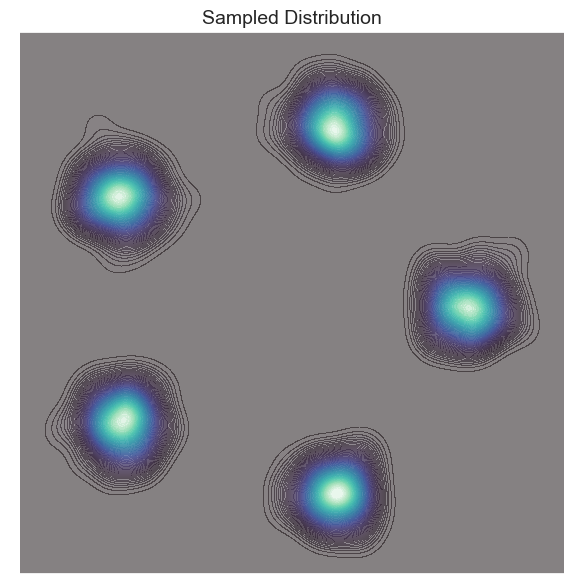

In [3]:
plot_samples(swiss.sample(1000), contour=False)

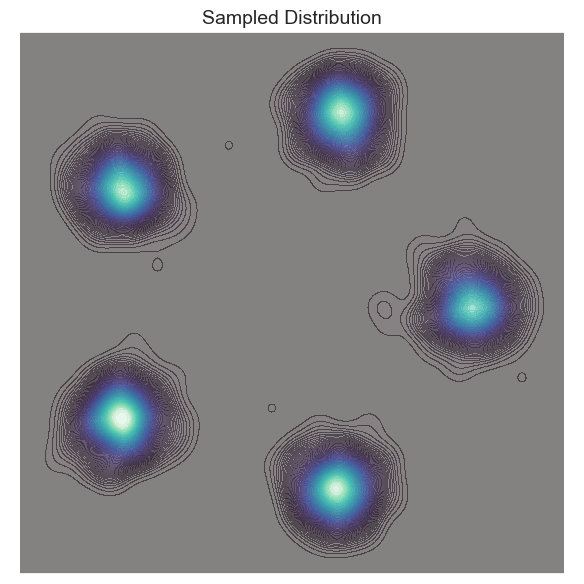

In [4]:
ode = VectorFieldODE(model)

solver = EulerODESolver(ode)

model_sampler = Sampler(solver)

steps= torch.linspace(0.0, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(model_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)